In [13]:
# Mobile Price Prediction using Linear Regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
import joblib

In [14]:
data = pd.read_csv("Student_Performance.csv")

In [15]:
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [16]:
# Encode the categorical variable 'Extracurricular Activities'
encoder = LabelEncoder()
data["Extracurricular Activities"] = encoder.fit_transform(data["Extracurricular Activities"])
print(dict(zip(encoder.classes_, encoder.transform(encoder.classes_))))

{'No': 0, 'Yes': 1}


In [17]:
# Prepare the feature set (X) and the target variable (y)
X = data.drop(columns="Performance Index")
y = data["Performance Index"]

In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [19]:
# Initialize the Linear Regression model
model = LinearRegression()

In [20]:
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [22]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the mean absolute error and the R^2 score
mean_abl_err = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)*100

print("Mean Absolute Error:", mean_abl_err)
print("R^2 Score:", r2)

Mean Absolute Error: 1.6138321434327187
R^2 Score: 98.92386793406651


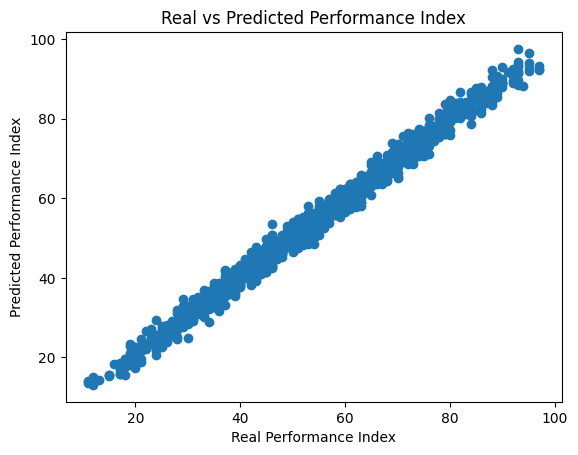

In [23]:
# Plot the real vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Real Performance Index")
plt.ylabel("Predicted Performance Index")
plt.title("Real vs Predicted Performance Index")
plt.show()

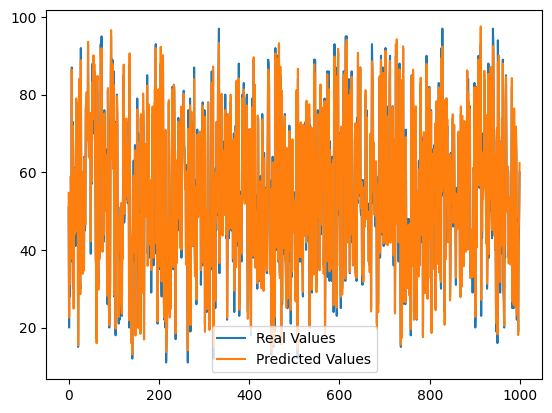

In [24]:
# Plot the actual vs predicted values
plt.plot(y_test.values, label="Real Values")
plt.plot(y_pred, label="Predicted Values")
plt.legend()
plt.show()

In [25]:
# Save the model
joblib.dump(model, "student_performance_model.joblib")

['student_performance_model.joblib']